## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report


<h2>Importing the dataset</h2>

In [2]:
df = pd.read_csv('datasets/disease-symptom-prediction/dataset.csv')
df.drop(['Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12',
        'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17'], axis=1, inplace=True)
print(df.head())
df1 = pd.read_csv('datasets/disease-symptom-prediction/Symptom-severity.csv')
df1.head()


            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6  
0   dischromic _patches       NaN       NaN  
1                   NaN       NaN       NaN  
2                   NaN       NaN       NaN  
3                   NaN       NaN       NaN  
4                   NaN       NaN       NaN  


,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


<h2>Cleaning of Data</h2>

In [3]:
df.isna().sum()
df.isnull().sum()


Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
dtype: int64

In [4]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

df = df.fillna(0)
df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0


<h2>Encoding the the symptoms with their severity weight</h2>

In [5]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom']
                                    == symptoms[i]]['weight'].values[0]

d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination', 0)
df = d.replace('foul_smell_of urine', 0)
df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,1,3,4,0,0,0
1,Fungal infection,3,4,0,0,0,0
2,Fungal infection,1,4,0,0,0,0
3,Fungal infection,1,3,0,0,0,0
4,Fungal infection,1,3,4,0,0,0


<h2> Storing the diseases and encoded symptoms in seperate dataframes</h2>

In [6]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()


array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [7]:
data = df.iloc[:, 1:].values
labels = df['Disease'].values


<h2>Splitting the data and training the model</h2>

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, shuffle=True, train_size=0.8, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(3936, 6) (984, 6) (3936,) (984,)


## KNN (C2)

Text(0, 0.5, 'Mean Error')

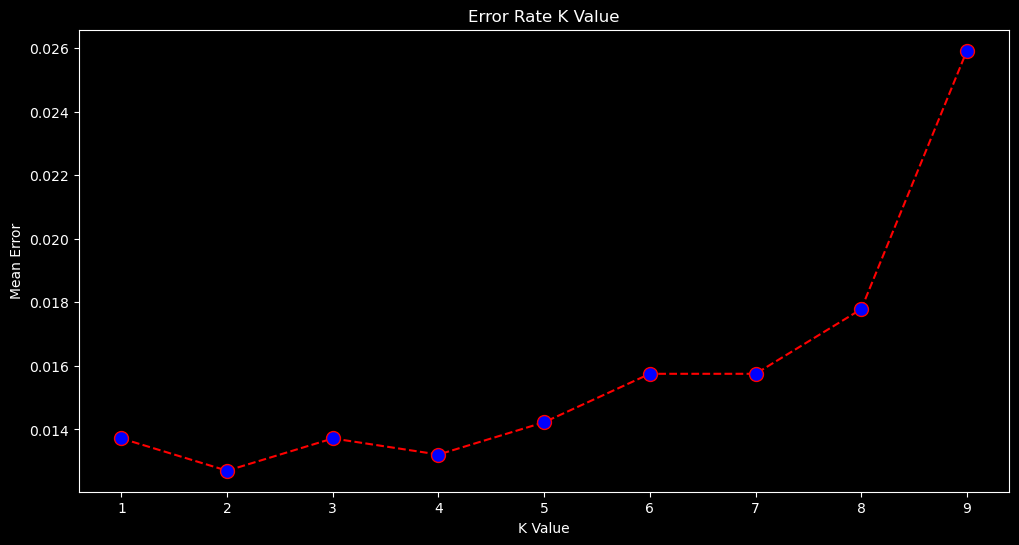

In [9]:
error = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_train)
    error.append(np.mean(pred_i != y_train))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [10]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=20)

F1-score% = 90.6212381868556 | Accuracy% = 90.65040650406505


<AxesSubplot: >

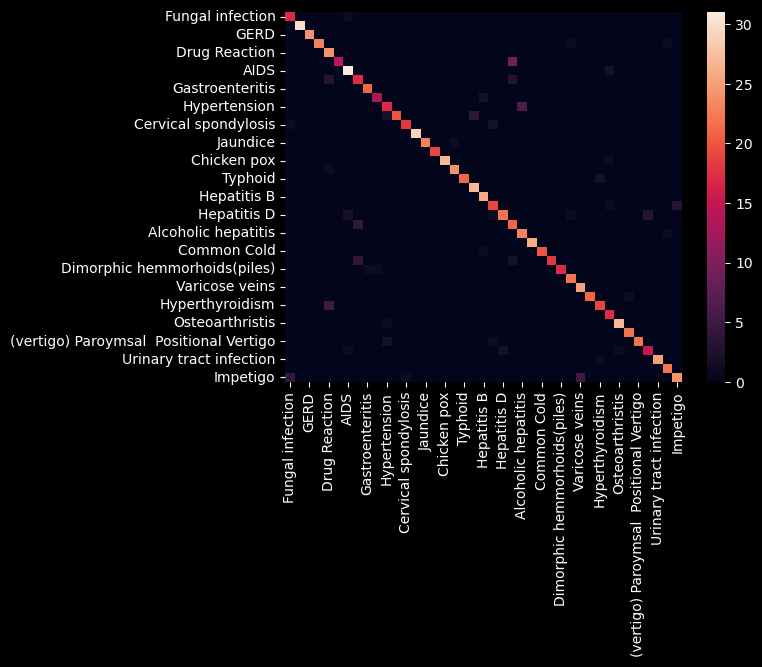

In [11]:
preds = knn.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(
    conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro') *
      100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)


In [12]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
knn_train = cross_val_score(
    knn, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(knn_train, columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" %
      (knn_train.mean()*100.0, knn_train.std()*100.0))


Mean Accuracy: 90.396%, Standard Deviation: (1.11%)


In [13]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
knn_test = cross_val_score(
    knn, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(knn_test, columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" %
      (knn_test.mean()*100.0, knn_test.std()*100.0))


Mean Accuracy: 73.575%, Standard Deviation: (4.40%)


In [14]:
print(classification_report(y_test, preds))


                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.77      0.94      0.85        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      0.92      0.96        25
                                Allergy       0.73      1.00      0.84        24
                              Arthritis       1.00      0.61      0.76        23
                       Bronchial Asthma       0.89      0.94      0.91        33
                   Cervical spondylosis       0.68      0.74      0.71        23
                            Chicken pox       0.95      1.00      0.98        21
                    Chronic cholestasis       0.93      0.87      0.90        15
                            Common Cold       0.77      0.74      0.76        23
                           

## Naive Bayes (B1)

In [15]:
bayes = GaussianNB()
bayes.fit(x_train, y_train)


GaussianNB()

F1-score% = 67.0820041850485 | Accuracy% = 70.630081300813


<AxesSubplot: >

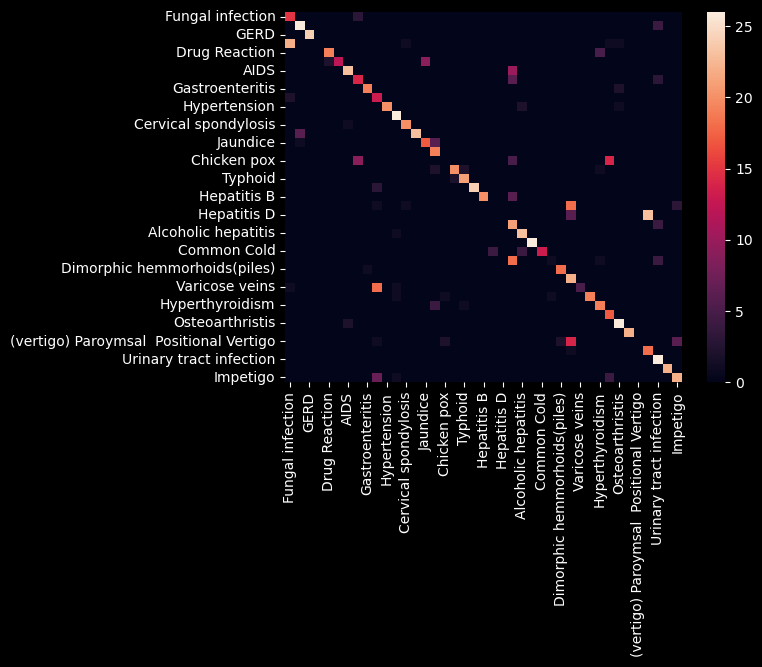

In [16]:
preds = bayes.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(
    conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro') *
      100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)


In [17]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
bayes_train = cross_val_score(
    bayes, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(bayes_train, columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" %
      (bayes_train.mean()*100.0, bayes_train.std()*100.0))


Mean Accuracy: 75.763%, Standard Deviation: (2.29%)


In [18]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
bayes_test = cross_val_score(
    bayes, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(bayes_test, columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" %
      (bayes_test.mean()*100.0, bayes_test.std()*100.0))


Mean Accuracy: 72.569%, Standard Deviation: (4.77%)


## Comparisons

In [19]:
n_groups = 2
algorithms = (
    'KNN', 'Naive Bayes')
train_accuracy = (
    knn_train.mean()*100.0,
    bayes_train.mean()*100.0
)

test_accuracy = (
    knn_test.mean()*100.0,
    bayes_test.mean()*100.0
)

Standard_Deviation = (
    knn_test.std()*100.0,
    bayes_test.std()*100.0
)


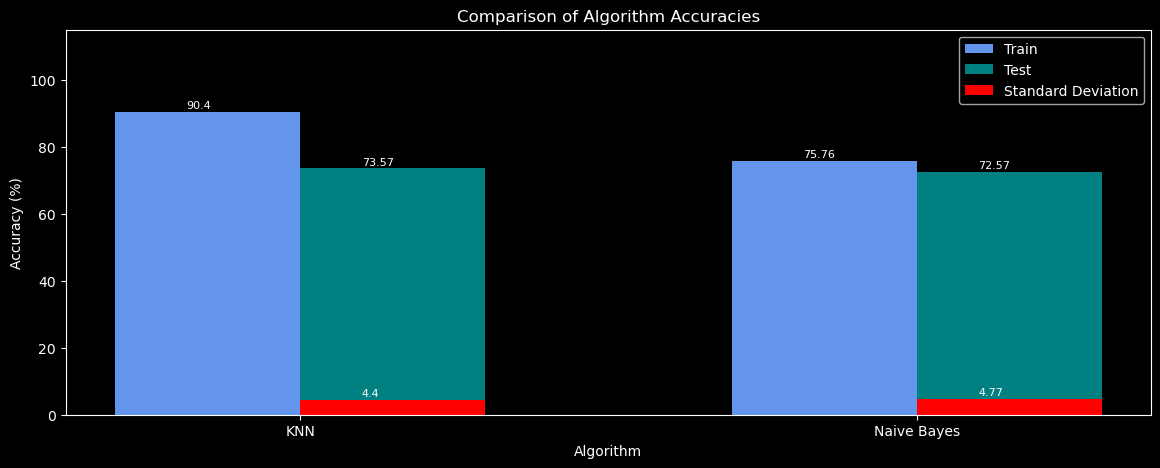

In [20]:
fig, ax = plt.subplots(figsize=(14, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1
rects1 = plt.bar(index, train_accuracy, bar_width,
                 alpha=opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width,
                 alpha=opacity, color='Teal', label='Test')
rects3 = plt.bar(index + bar_width, Standard_Deviation, bar_width,
                 alpha=opacity, color='red', label='Standard Deviation')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies')
plt.xticks(index + bar_width * 0.5, algorithms)
plt.legend(loc='upper right')
for index, data in enumerate(train_accuracy):
    plt.text(x=index - 0.035, y=data + 1,
             s=round(data, 2), fontdict=dict(fontsize=8))
for index, data in enumerate(test_accuracy):
    plt.text(x=index + 0.25, y=data + 1,
             s=round(data, 2), fontdict=dict(fontsize=8))
for index, data in enumerate(Standard_Deviation):
    plt.text(x=index + 0.25, y=data + 1,
             s=round(data, 2), fontdict=dict(fontsize=8))
